# Phase 3 — Predictive Modeling & Inference


In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
print("Libraries imported.")

Libraries imported.


In [7]:
pd.read_csv("../data/phase2_monthly_features.csv").head()

,Unnamed: 0,species,humidity,air_temperature,temp_lag_3,hum_lag_3,T2M_lag_1,RH2M_lag_1,T2M_lag_3,RH2M_lag_3,T2M_lag_6,RH2M_lag_6
0,2020-01-01,192.0,73.36,18.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,209.0,65.38,20.71,NaN,NaN,18.15,73.36,NaN,NaN,NaN,NaN
2,2020-03-01,196.0,67.19,26.24,NaN,NaN,20.71,65.38,NaN,NaN,NaN,NaN
3,2020-04-01,72.0,66.88,29.66,18.15,73.36,26.24,67.19,18.15,73.36,NaN,NaN
4,2020-05-01,85.0,77.71,29.40,20.71,65.38,29.66,66.88,20.71,65.38,NaN,NaN


In [8]:
df = pd.read_csv(
    "../data/phase2_monthly_features.csv",
    parse_dates=[0],
    index_col=0
)

df.index.name = "DATE"
df.head()


,species,humidity,air_temperature,temp_lag_3,hum_lag_3,T2M_lag_1,RH2M_lag_1,T2M_lag_3,RH2M_lag_3,T2M_lag_6,RH2M_lag_6
DATE,,,,,,,,,,,
2020-01-01,192.0,73.36,18.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,209.0,65.38,20.71,NaN,NaN,18.15,73.36,NaN,NaN,NaN,NaN
2020-03-01,196.0,67.19,26.24,NaN,NaN,20.71,65.38,NaN,NaN,NaN,NaN
2020-04-01,72.0,66.88,29.66,18.15,73.36,26.24,67.19,18.15,73.36,NaN,NaN
2020-05-01,85.0,77.71,29.40,20.71,65.38,29.66,66.88,20.71,65.38,NaN,NaN


In [9]:
df_model = df.dropna()
df_model.shape

(64, 11)

In [10]:
y = df_model["species"]

In [11]:
X = df_model.drop(columns=["species"])

In [12]:
X.columns

Index(['humidity', 'air_temperature', 'temp_lag_3', 'hum_lag_3', 'T2M_lag_1',
       'RH2M_lag_1', 'T2M_lag_3', 'RH2M_lag_3', 'T2M_lag_6', 'RH2M_lag_6'],
      dtype='object')

In [16]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("R²:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))


R²: 0.2813886454790048
MAE: 42.67718326535773


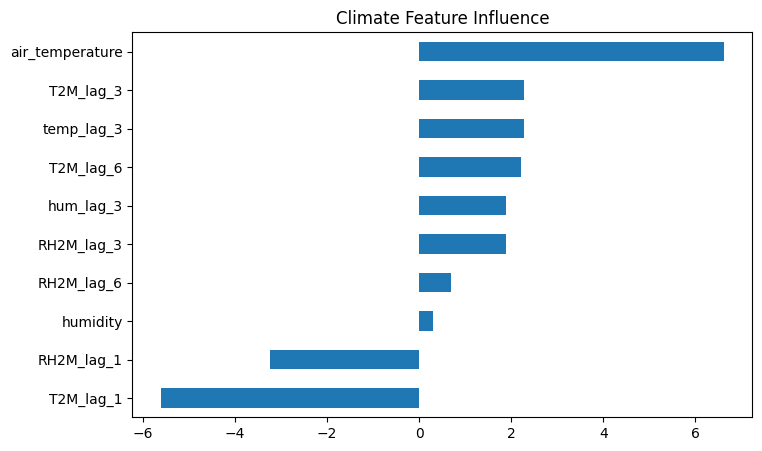

In [17]:
coef = pd.Series(
    model.coef_,
    index=X.columns
).sort_values()

coef.plot(kind="barh", figsize=(8,5), title="Climate Feature Influence")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

X_train.shape, X_test.shape


((51, 10), (13, 10))

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_lr = model.predict(X_test)

print("Linear Regression Performance")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Performance
R²: -0.914424116511898
MAE: 92.90984513311842
RMSE: 107.14252828822484


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Performance
R²: -1.4772171762365875
MAE: 102.86841738959048
RMSE: 121.87786936824662


In [22]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
})

results


,Model,R2,MAE,RMSE
0,Linear Regression,-0.914424,92.909845,107.142528
1,Random Forest,-1.477217,102.868417,121.877869


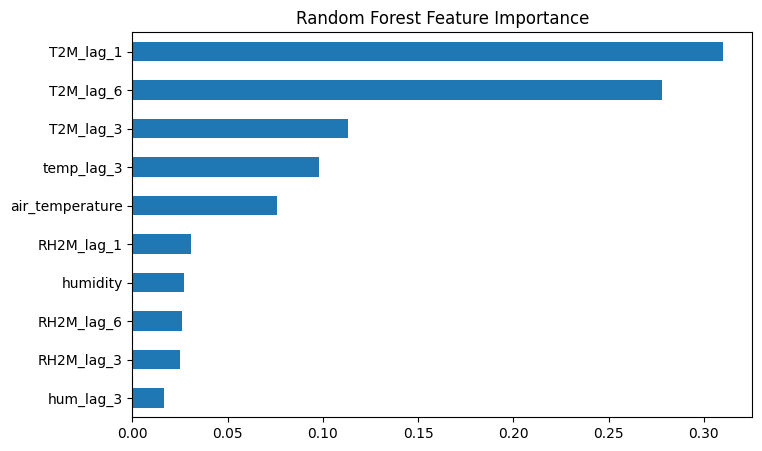

In [24]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values()

importances.plot(
    kind="barh",
    figsize=(8,5),
    title="Random Forest Feature Importance"
)
plt.show()


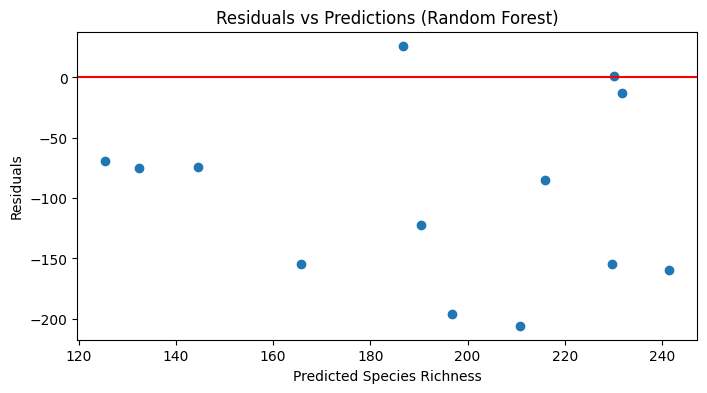

In [25]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,4))
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color="red")
plt.title("Residuals vs Predictions (Random Forest)")
plt.xlabel("Predicted Species Richness")
plt.ylabel("Residuals")
plt.show()


In [27]:
import os
os.makedirs("../models", exist_ok=True)

In [28]:
import joblib
joblib.dump(rf, "../models/biodiversity_model.pkl")
print("Model saved successfully.")


Model saved successfully.


In [30]:
model.feature_names_in_

array(['humidity', 'air_temperature', 'temp_lag_3', 'hum_lag_3',
       'T2M_lag_1', 'RH2M_lag_1', 'T2M_lag_3', 'RH2M_lag_3', 'T2M_lag_6',
       'RH2M_lag_6'], dtype=object)